<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Grouping Data with Pandas

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

You are going to investigate UFO sightings around the US.  This lab will give you practice performing `groupby` operations to split data along multiple dimensions and investigate patterns between subsets of the data using basic aggregation.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [8]:
ufo_csv = './datasets/ufo.csv'

In [4]:
df = pd.read_csv('./datasets/ufo.csv')

df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [10]:
df.isnull().sum(axis = 0)

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

#### 3. Which city has the most observations?

In [37]:
city_count = df.groupby(['City'])['City'].count()
city_count_sort = city_count.sort_values(ascending= False)
city_count_sort

City
Seattle                       646
New York City                 612
Phoenix                       533
Las Vegas                     442
Portland                      438
Los Angeles                   416
San Diego                     401
Houston                       340
Chicago                       337
Miami                         279
Tucson                        278
Orlando                       264
Austin                        254
Springfield                   246
Albuquerque                   244
Columbus                      235
Sacramento                    232
Denver                        219
San Francisco                 216
San Jose                      212
Jacksonville                  203
Myrtle Beach                  201
San Antonio                   201
Dallas                        195
Salem                         182
St. Louis                     175
Charlotte                     174
Columbia                      169
Mesa                          165
Louisvill

#### 4. What is the observation count per shape?

In [6]:
shape_count = df.groupby('Shape Reported')['Shape Reported'].count()
shape_count_sorted = shape_count.sort_values(ascending= False)
shape_head = [shape_count_sorted.head()]
shape_head

[Shape Reported
 LIGHT       16332
 TRIANGLE     7816
 CIRCLE       7725
 FIREBALL     6249
 OTHER        5506
 Name: Shape Reported, dtype: int64]

#### 5. Create a subset of the data that is the top 5 cities and the top 5 shapes.

In [5]:
city_mask = df.set_index('City', 'Shape Reported')
city_mask_new = city_mask.loc[('Seattle', 'New York City', 'Phoenix', 'Las Vegas', 'Portland'), :]

reset_index = city_mask_new.reset_index()

shape_mask = reset_index.set_index('Shape Reported')
shape_mask_new = shape_mask.loc[('LIGHT', 'TRIANGLE', 'CIRCLE', 'FIREBALL', 'OTHER'), :]
shape_mask_new


,City,Colors Reported,State,Time
Shape Reported,,,,
LIGHT,Seattle,NaN,WA,12/24/1994 1:39
LIGHT,Seattle,NaN,WA,1/5/1995 9:50
LIGHT,Seattle,NaN,WA,12/4/1995 2:14
LIGHT,Seattle,NaN,WA,6/12/1996 12:15
LIGHT,Seattle,NaN,WA,11/4/1997 20:45
LIGHT,Seattle,NaN,WA,11/12/1997 17:30
LIGHT,Seattle,NaN,WA,12/11/1997 19:15
LIGHT,Seattle,NaN,WA,12/17/1998 22:00
LIGHT,Seattle,GREEN,WA,1/2/1999 17:42


#### 6. With the subset, find the percent of each shape seen by city.

In [6]:
reset_index_2 = shape_mask_new.reset_index()

shape_count_2 = reset_index_2.groupby(['Shape Reported', 'City'])['Shape Reported'].count()
shape_count_2

Shape Reported  City         
CIRCLE          Las Vegas         42
                New York City     56
                Phoenix           34
                Portland          46
                Seattle           50
FIREBALL        Las Vegas         22
                New York City     35
                Phoenix           35
                Portland          29
                Seattle           55
LIGHT           Las Vegas         85
                New York City    105
                Phoenix          106
                Portland         100
                Seattle          129
OTHER           Las Vegas         36
                New York City     42
                Phoenix           46
                Portland          29
                Seattle           51
TRIANGLE        Las Vegas         31
                New York City     40
                Phoenix           45
                Portland          27
                Seattle           46
Name: Shape Reported, dtype: int64

**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

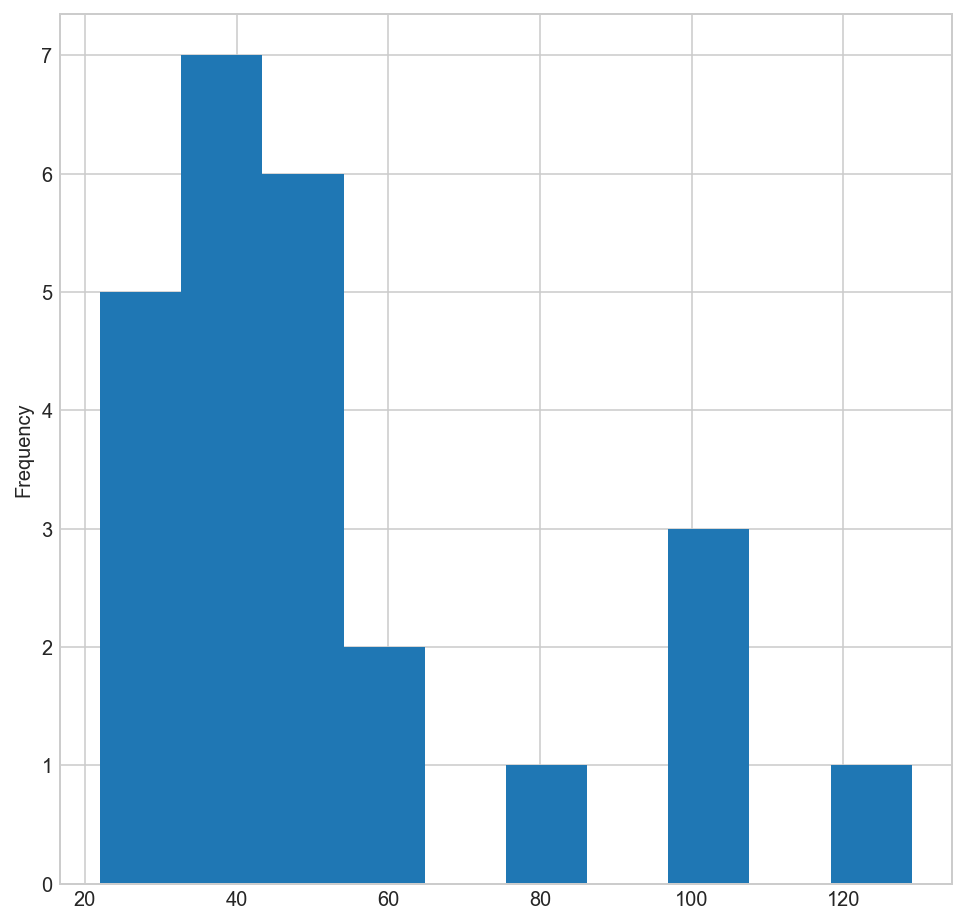

In [11]:
shape_count_2.plot(kind = 'hist', figsize = (8, 8))